In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [8]:

# Load your time series data into a DataFrame (replace 'your_data.csv' with your actual file)
df = pd.read_csv('wwwusage.csv')


In [11]:
print(df.columns)



Index(['x'], dtype='object')


In [12]:
df['x'] = pd.to_datetime(df['x'])


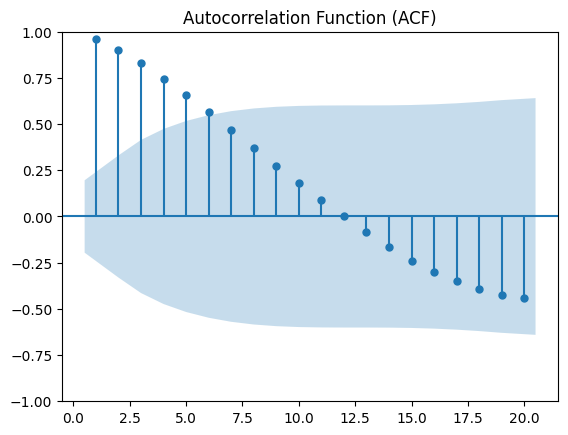

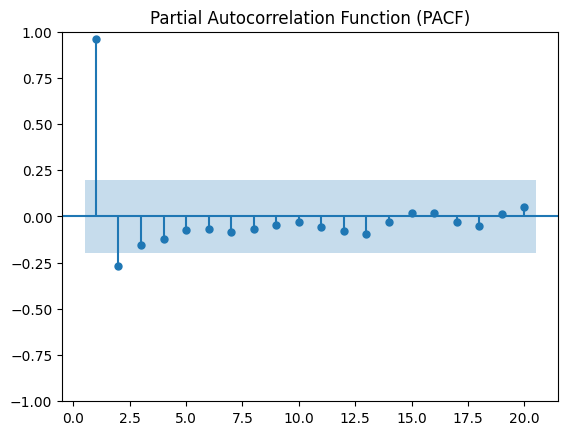

In [14]:
# Plot ACF and PACF
plot_acf(df['x'], lags=20, zero=False)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['x'], lags=20, zero=False)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Model estimation

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Choose p, d, q values based on ACF and PACF plots
# For example, if you choose p=1, d=1, q=1
model = ARIMA(df['x'], order=(1, 1, 1))


In [20]:
# Convert 'date' column to datetime if it's not already
df['x'] = pd.to_datetime(df['x'])

# Ensure 'x' column is of numeric type
df['x'] = pd.to_numeric(df['x'], errors='coerce')


# Choose p, d, q values based on ACF and PACF plots
# For example, if you choose p=1, d=1, q=1
model = ARIMA(df['x'].dropna(), order=(1, 1, 1))

# Fit the ARIMA model to the training data
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Thu, 18 Jan 2024   AIC                            514.300
Time:                        02:17:15   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

In [25]:
# Split your data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Fit the ARIMA model on the training set
model = ARIMA(train['x'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model's performance using MSE and RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(test['x'], predictions)
rmse = sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 4387.299401371902
Root Mean Squared Error (RMSE): 66.2366922586862


c:\Users\niloy\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


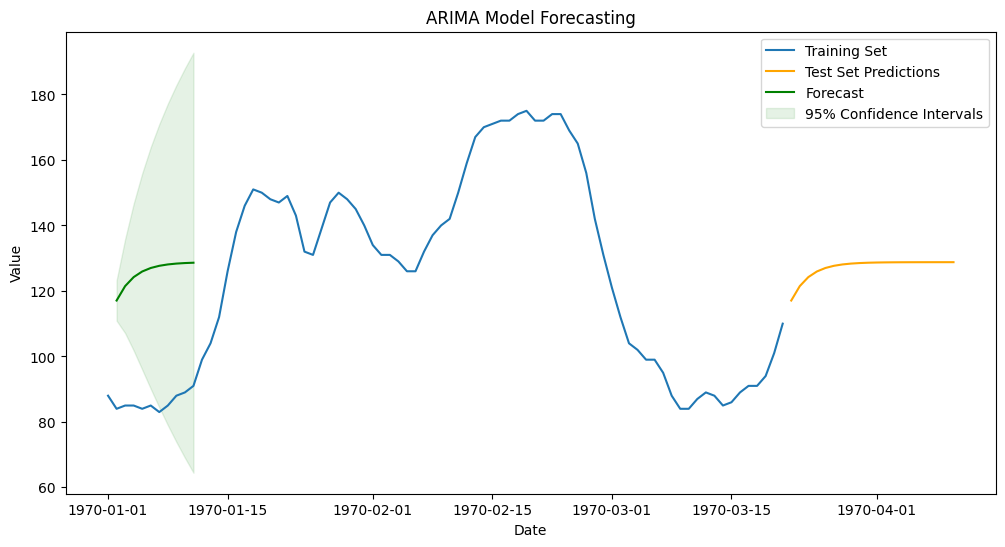

In [28]:
# Forecast future time points
future_steps = 10  # Adjust as needed
forecast = model_fit.get_forecast(steps=future_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Visualize the forecasts along with confidence intervals
plt.plot(train['x'], label='Training Set')
plt.plot(test.index, predictions, label='Test Set Predictions', color='orange')
plt.plot(pd.date_range(test.index[-1], periods=future_steps + 1, freq='D')[1:], forecast_values, label='Forecast', color='green')

# Confidence intervals
plt.fill_between(pd.date_range(test.index[-1], periods=future_steps + 1, freq='D')[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.1, label='95% Confidence Intervals')

plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

